Notebook with a correlation analysis of the probabilities from this study and p-values obtained in a previous study based on GO terms.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr
from tqdm.auto import tqdm

In [2]:
tqdm.pandas()

In [3]:
df = pd.read_csv('results.csv')
df = df.rename(columns={'p': 'proba'})
df

,Gen,Phn,proba
0,SLC9A1,D1071,0.983144
1,MAGI3,D1071,0.874537
2,S100A14,D1071,0.728153
3,C1orf35,D1071,0.831546
4,SUPT7L,D1071,0.994575
...,...,...,...
703003,DDX11,D1222,0.002606
703004,ITPK1,D1222,0.002593
703005,MORF4,D1222,0.001918
703006,NINJ1,D1222,0.002593


In [4]:
pval = pd.read_csv('data/PvalGenFrm.csv', index_col=0)
pval

,C1007,C1010,C1052,C1067,C1068,C1069,C1080,D1071,D1072,D1073,...,D1720,D1725,H3000,L2000,L2001,L2002,L2003,L2004,L2005,L2006
A1BG,0.015260,0.033936,0.024465,0.009954,0.017598,0.016716,0.000394,0.033000,4.200000e-03,0.0059,...,0.0320,0.0520,0.004130,0.00110,0.00430,0.02700,0.0150,0.00025,0.00099,0.00690
A1BG-AS1,0.107584,0.033936,0.054779,0.009954,0.017598,0.010538,0.010430,0.033000,4.200000e-03,0.0059,...,0.0430,0.0520,0.004130,0.00110,0.00430,0.02700,0.0150,0.00034,0.00099,0.00690
A1CF,0.002029,0.001396,0.005065,0.011311,0.037745,0.028450,0.000009,0.004800,6.400000e-03,0.0110,...,0.0120,0.0027,0.000314,0.00380,0.00180,0.02500,0.0025,0.00150,0.00530,0.00920
A2M,0.037412,0.007708,0.012106,0.020634,0.000364,0.004140,0.010497,0.012000,2.400000e-06,0.0061,...,0.0200,0.0110,0.012417,0.00094,0.00130,0.00730,0.0015,0.00540,0.00490,0.00062
A2M-AS1,0.090107,0.007708,0.012106,0.073386,0.000364,0.006357,0.026469,0.034000,2.500000e-07,0.0066,...,0.0200,0.0110,0.012417,0.00460,0.00130,0.00730,0.0033,0.00540,0.00490,0.00120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11AP1,0.032217,0.008297,0.095441,0.268324,0.001759,0.008430,0.223344,0.036000,6.700000e-02,0.0210,...,0.1800,0.1000,0.022594,0.04600,0.03700,0.02300,0.0340,0.01800,0.03400,0.01200
ZYG11B,0.006403,0.004135,0.003707,0.000950,0.013315,0.028952,0.028226,0.000250,4.900000e-02,0.0160,...,0.0086,0.0020,0.001245,0.00700,0.00120,0.00700,0.0019,0.00490,0.00160,0.00053
ZYXP1,0.004447,0.039029,0.021930,0.034819,0.009717,0.037183,0.004327,0.018000,1.000000e-03,0.0180,...,0.2100,0.1000,0.051050,0.06600,0.02400,0.00018,0.0071,0.00110,0.00310,0.03700
ZZEF1,0.011385,0.015092,0.001959,0.008431,0.007263,0.005147,0.001542,0.000039,8.000000e-03,0.0011,...,0.0024,0.0230,0.001294,0.00098,0.00064,0.00180,0.0022,0.00470,0.00065,0.00028


In [5]:
def map_pval(row):
    gen = row['Gen']
    phn = row['Phn']
    
    try:
        return -np.log10(pval.loc[gen][phn])
    except:
        return np.nan

In [6]:
df['-log10(p-val)'] = df.progress_apply(map_pval, axis=1)

  0%|          | 0/703008 [00:00<?, ?it/s]

In [7]:
df

,Gen,Phn,proba,-log10(p-val)
0,SLC9A1,D1071,0.983144,7.958607
1,MAGI3,D1071,0.874537,9.853872
2,S100A14,D1071,0.728153,7.356547
3,C1orf35,D1071,0.831546,9.221849
4,SUPT7L,D1071,0.994575,9.318759
...,...,...,...,...
703003,DDX11,D1222,0.002606,2.060481
703004,ITPK1,D1222,0.002593,3.318759
703005,MORF4,D1222,0.001918,NaN
703006,NINJ1,D1222,0.002593,1.522879


In [8]:
df = df.dropna()
df

,Gen,Phn,proba,-log10(p-val)
0,SLC9A1,D1071,0.983144,7.958607
1,MAGI3,D1071,0.874537,9.853872
2,S100A14,D1071,0.728153,7.356547
3,C1orf35,D1071,0.831546,9.221849
4,SUPT7L,D1071,0.994575,9.318759
...,...,...,...,...
703002,AGO2,D1222,0.001918,3.000000
703003,DDX11,D1222,0.002606,2.060481
703004,ITPK1,D1222,0.002593,3.318759
703006,NINJ1,D1222,0.002593,1.522879


<AxesSubplot:xlabel='proba', ylabel='-log10(p-val)'>

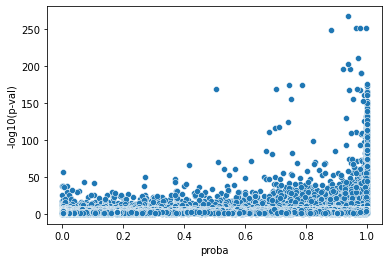

In [9]:
sns.scatterplot(data=df, x='proba', y='-log10(p-val)')

In [10]:
pearsonr(df['proba'], df['-log10(p-val)'])

(0.2629548650026442, 0.0)

In [11]:
for phn in df['Phn'].unique():
    dx = df[df['Phn'] == phn]
    corr = np.corrcoef(dx['proba'], dx['-log10(p-val)'])[0, 1]
    
    print(phn, corr)

D1071 0.20549109889168501
D1536 0.12121702330671164
D1251 0.3036089045830128
D1249 0.32859315512985837
D1526 0.10196115970424655
D1091 0.2338157185805532
D1092 0.21905330441514403
D1082 0.2361203420929957
L2001 0.22510885566130473
L2005 0.23031428008190988
D1112 0.19685862744732416
D1111 0.2347087441811007
D1502 0.058168182648234305
D1085 0.21064713516920103
D1245 0.18856359892373284
D1075 0.41772293663737226
D1183 0.18458911228894076
D1182 0.19336183870594303
D1156 0.16901026853745518
D1248 0.0007898629126435608
C1007 0.017452063468671664
D1077 0.2525095620086726
D1321 0.3856458017495503
C1010 0.32304274863409094
C1068 0.37575684996016134
C1069 0.39155470296816175
D1250 0.42316151520318046
D1416 0.4505530706738775
D1153 0.4429736508534942
D1524 0.3070054419417793
D1269 0.41800672825340024
D1284 0.347898077605556
D1523 0.3017968924975285
D1537 0.5111308503947921
D1320 0.20332175208174214
D1155 0.4393321489510735
L2003 0.23155992739479464
D1159 0.5028072635311523
D1268 0.104748021907481

<AxesSubplot:>

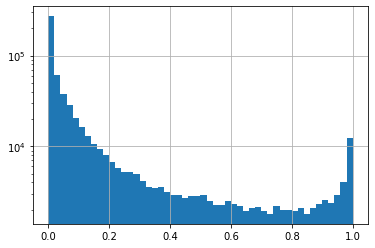

In [12]:
df['proba'].hist(bins=50, log=True)

<AxesSubplot:>

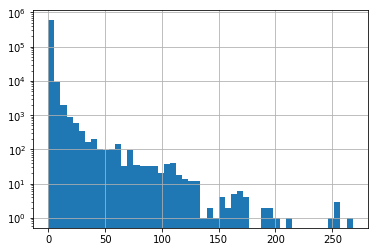

In [13]:
df['-log10(p-val)'].hist(bins=50, log=True)